In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("AB_NYC_2019.csv")

In [3]:
df.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


In [4]:
df.isnull().sum()

name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [5]:
df.isnull().sum()*100/len(df)

name                               0.032723
host_id                            0.000000
host_name                          0.042949
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       20.558339
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

In [6]:
y=df["last_review"].mode()
y

0    23-06-2019
Name: last_review, dtype: object

In [7]:
df["last_review"].fillna("2018-09-23",inplace=True)

In [8]:
df["last_review"]=pd.to_datetime(df["last_review"])

In [9]:
y=df["reviews_per_month"].mean()
y

1.3732214298586884

In [10]:
df["reviews_per_month"].fillna(y,inplace=True)

In [11]:
df.isnull().sum()

name                              16
host_id                            0
host_name                         21
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
last_review                        0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [12]:
df.dropna(inplace=True)

In [13]:
df.isnull().sum()

name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [14]:
df.drop("host_id",axis=1,inplace=True)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48858 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   name                            48858 non-null  object        
 1   host_name                       48858 non-null  object        
 2   neighbourhood_group             48858 non-null  object        
 3   neighbourhood                   48858 non-null  object        
 4   latitude                        48858 non-null  float64       
 5   longitude                       48858 non-null  float64       
 6   room_type                       48858 non-null  object        
 7   price                           48858 non-null  int64         
 8   minimum_nights                  48858 non-null  int64         
 9   number_of_reviews               48858 non-null  int64         
 10  last_review                     48858 non-null  datetime64[ns]
 11  re

1.provide all the information about airbnb newyork bookings which is  available whole year 

In [16]:
y=df.groupby("availability_365")
k=y.get_group(365)
k

,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.210000,6,365
2,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2018-09-23,1.373221,1,365
36,Clean and Quiet in Brooklyn,Vt,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,2018-09-23,1.373221,1,365
38,Country space in the city,Harriet,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,2018-09-23,1.373221,1,365
97,"Upper Manhattan, New York",Elliott,Manhattan,Harlem,40.82803,-73.94731,Private room,89,1,1,2018-09-10,0.110000,1,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48744,A BEAUTIFUL SPACE IN HEART OF WILLIAMSBURG,Simon And Julian,Brooklyn,Williamsburg,40.71091,-73.96560,Entire home/apt,499,30,0,2018-09-23,1.373221,1,365
48844,West Village Studio on quiet cobblestone street,Will,Manhattan,West Village,40.73620,-74.00827,Entire home/apt,205,1,0,2018-09-23,1.373221,1,365
48868,Heaven for you(only for guy),Diana,Brooklyn,Gravesend,40.59118,-73.97119,Shared room,25,7,0,2018-09-23,1.373221,6,365
48880,The Raccoon Artist Studio in Williamsburg New ...,Melki,Brooklyn,Williamsburg,40.71232,-73.94220,Entire home/apt,120,1,0,2018-09-23,1.373221,3,365


There are 1294 bookings availbale whole year 

2.how many neighbourhood_group are available describe name and the count  

In [17]:
df["neighbourhood_group"].value_counts()

Manhattan        21643
Brooklyn         20089
Queens            5664
Bronx             1089
Staten Island      373
Name: neighbourhood_group, dtype: int64

3.graphical representation of neighbourhood_group

<AxesSubplot:xlabel='neighbourhood_group', ylabel='count'>

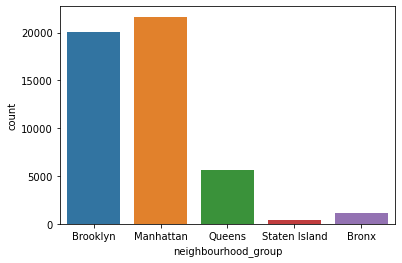

In [18]:
sns.countplot(data=df,x='neighbourhood_group' )


4.which neighbourhood belongs to brooklyn(with  graph representation) 

<AxesSubplot:>

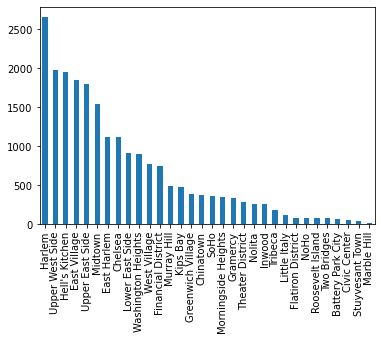

In [19]:
df[df["neighbourhood_group"]=="Manhattan"]["neighbourhood"].value_counts().plot(kind="bar")

harlem has highest count of booking in brooklyn

5.categorize room type 

In [32]:
df["room_type"].value_counts()

Entire home/apt    25393
Private room       22306
Shared room         1159
Name: room_type, dtype: int64

graphical representation of above query 

<AxesSubplot:>

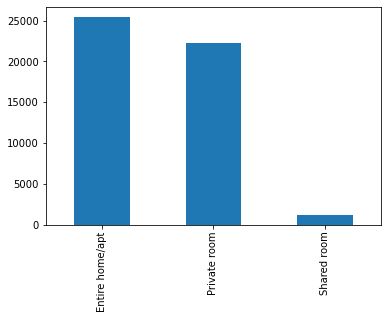

In [55]:
df["room_type"].value_counts().plot(kind="bar")

maximum bookings is for entire home or apartment minimum booking are for shared room

6.visualize price column

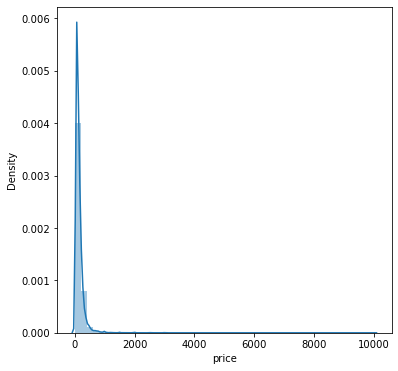

In [26]:
plt.figure(figsize=(6,6))
sns.distplot(df["price"])
plt.show()

In [ ]:
The data is right skewed so outlier is present in the right corner (positively skewed)

In [ ]:
7.highest price bookings

In [49]:
t=df["price"].max()
y=df.groupby("price")
k=y.get_group(t)
k

,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
9151,Furnished room in Astoria apartment,Kathrine,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,2016-02-13,0.040000,1,0
17692,Luxury 1 bedroom apt. -stunning Manhattan views,Erin,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,2017-07-27,0.160000,1,0
29238,1-BR Lincoln Center,Jelena,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,2018-09-23,1.373221,1,83


8.minimum price 

In [51]:
t=df["price"].min()
y=df.groupby("price")
k=y.get_group(t)
k

,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
23161,"Huge Brooklyn Brownstone Living, Close to it all.",Kimberly,Brooklyn,Bedford-Stuyvesant,40.69023,-73.95428,Private room,0,4,1,2018-06-01,0.050000,4,28
25433,★Hostel Style Room | Ideal Traveling Buddies★,Anisha,Bronx,East Morrisania,40.83296,-73.88668,Private room,0,2,55,2019-06-24,2.560000,4,127
25634,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",Martial Loft,Brooklyn,Bushwick,40.69467,-73.92433,Private room,0,2,16,2019-05-18,0.710000,5,0
25753,"Sunny, Quiet Room in Greenpoint",Lauren,Brooklyn,Greenpoint,40.72462,-73.94072,Private room,0,2,12,2017-10-27,0.530000,2,0
25778,Modern apartment in the heart of Williamsburg,Aymeric,Brooklyn,Williamsburg,40.70838,-73.94645,Entire home/apt,0,5,3,2018-02-01,0.150000,1,73
25794,Spacious comfortable master bedroom with nice ...,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68173,-73.91342,Private room,0,1,93,2019-06-15,4.280000,6,176
25795,Contemporary bedroom in brownstone with nice view,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68279,-73.91170,Private room,0,1,95,2019-06-21,4.370000,6,232
25796,Cozy yet spacious private brownstone bedroom,Adeyemi,Brooklyn,Bedford-Stuyvesant,40.68258,-73.91284,Private room,0,1,95,2019-06-23,4.350000,6,222
26259,the best you can find,Qiuchi,Manhattan,Murray Hill,40.75091,-73.97597,Entire home/apt,0,3,0,2018-09-23,1.373221,1,0
26841,Coliving in Brooklyn! Modern design / Shared room,Sergii,Brooklyn,Bushwick,40.69211,-73.90670,Shared room,0,30,2,2019-06-22,0.110000,6,333


9.minimum reviews

In [53]:
t=df["number_of_reviews"].min()
y=df.groupby("number_of_reviews")
k=y.get_group(t)
k

,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2,THE VILLAGE OF HARLEM....NEW YORK !,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2018-09-23,1.373221,1,365
19,Huge 2 BR Upper East Cental Park,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,2018-09-23,1.373221,2,249
26,Magnifique Suite au N de Manhattan - vue Cloitres,Claude & Sophie,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,2018-09-23,1.373221,1,0
36,Clean and Quiet in Brooklyn,Vt,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,2018-09-23,1.373221,1,365
38,Country space in the city,Harriet,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,2018-09-23,1.373221,1,365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Charming one bedroom - newly renovated rowhouse,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2018-09-23,1.373221,2,9
48891,Affordable room in Bushwick/East Williamsburg,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,2018-09-23,1.373221,2,36
48892,Sunny Studio at Historical Neighborhood,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,2018-09-23,1.373221,1,27
48893,43rd St. Time Square-cozy single bed,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,2018-09-23,1.373221,6,2


10.highets number_of_reviews

In [54]:
t=df["number_of_reviews"].max()
y=df.groupby("number_of_reviews")
k=y.get_group(t)
k

,name,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
11759,Room near JFK Queen Bed,Dona,Queens,Jamaica,40.6673,-73.76831,Private room,47,1,629,2019-05-07,14.58,2,333


<AxesSubplot:>

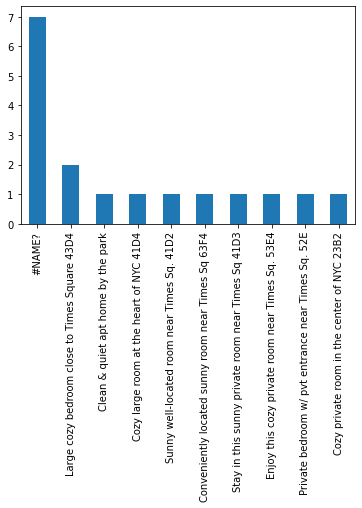

In [25]:
df[df["host_name"]=='John']['name'].value_counts().head(10).plot(kind='bar')